# Thematic Analysis

In [22]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. 📦 Import Libraries

In [23]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from visualization.sentiment_visualizer import SentimentThemeVisualizer

In [24]:
warnings.filterwarnings("ignore")

## 2. 📂 Load Processed Data

In [25]:
df = pd.read_csv("../../data/outputs/sentiment_theme_output.csv")
df.head()

,review_text,rating,date,bank,source,cleaned_text,sentiment_label,sentiment_score,keywords,themes
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play,not atms support accounttoaccount transfer lik...,negative,0.995594,"['country', 'support', 'transfer', 'like', 'not']",['Customer Support']
1,what is this app problem???,1,2025-06-05,CBE,Google Play,app problem,negative,0.999191,"['app problem', 'problem', 'app']",['Miscellaneous']
2,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play,app proactive good connection,positive,0.999832,"['connection', 'good', 'app']",['Miscellaneous']
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play,send cbebirr app app,negative,0.979366,"['app app', 'send', 'app']",['Miscellaneous']
4,good,4,2025-06-05,CBE,Google Play,good,positive,0.999816,['good'],['Miscellaneous']


In [26]:
#size of data
df.shape

(2350, 10)

In [27]:
df.sample(10)

,review_text,rating,date,bank,source,cleaned_text,sentiment_label,sentiment_score,keywords,themes
1406,Awful,1,2024-06-06,BOA,Google Play,awful,negative,0.999795,[],['Miscellaneous']
2172,why does it ask me for both pin and opt even t...,2,2025-04-02,Dashen,Google Play,ask pin opt opt touch let,negative,0.923465,"['touch', 'let', 'pin', 'ask']",['Miscellaneous']
2003,"This super app is a total game-changer—fast, r...",5,2025-04-23,Dashen,Google Play,super app total gamechangerfast reliable pack ...,positive,0.612661,"['super', 'total', 'pack', 'place', 'seamless']",['Miscellaneous']
1004,very good,5,2025-03-25,BOA,Google Play,good,positive,0.999816,['good'],['Miscellaneous']
2195,This app is not supporting smart phones that h...,1,2025-03-20,Dashen,Google Play,app support smart phone old android version in...,negative,0.999452,"['inclusive', 'lite', 'android version', 'stac...",['Miscellaneous']
2322,It has a great application features from the b...,5,2025-01-15,Dashen,Google Play,great application feature beginning m glad use...,positive,0.971866,"['use not', 'activate account', 'comprehensive...",['Miscellaneous']
1941,good,5,2025-05-20,Dashen,Google Play,good,positive,0.999816,['good'],['Miscellaneous']
1898,Tnx for updating the app its easy and fadt,5,2024-02-04,BOA,Google Play,tnx update app easy fadt,negative,0.979604,"['tnx', 'app easy', 'update app', 'easy', 'upd...",['Feature Requests']
984,boa of mobile backing,5,2025-04-09,BOA,Google Play,boa mobile backing,negative,0.750616,"['boa mobile', 'boa', 'mobile']",['Miscellaneous']
571,It is one of the disappointed Bank you don't s...,1,2025-03-10,CBE,Google Play,disappointed bank not suppose include ethiopia...,negative,0.991984,"['bank not', 'disappointed', 'not deserve', 'd...",['Miscellaneous']


In [28]:
# instatiate the sentiment theme visualizer
viz = SentimentThemeVisualizer("../../data/outputs/sentiment_theme_output.csv")

2025-06-09 10:10:32,265 - INFO - Data loaded successfully from ../../data/outputs/sentiment_theme_output.csv


## 3. 🔍 Inspect Data Structure

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_text      2350 non-null   object 
 1   rating           2350 non-null   int64  
 2   date             2350 non-null   object 
 3   bank             2350 non-null   object 
 4   source           2350 non-null   object 
 5   cleaned_text     2350 non-null   object 
 6   sentiment_label  2350 non-null   object 
 7   sentiment_score  2350 non-null   float64
 8   keywords         2350 non-null   object 
 9   themes           2350 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 183.7+ KB


In [30]:
df.columns

Index(['review_text', 'rating', 'date', 'bank', 'source', 'cleaned_text',
       'sentiment_label', 'sentiment_score', 'keywords', 'themes'],
      dtype='object')

## 4. 📊 Sentiment Distribution

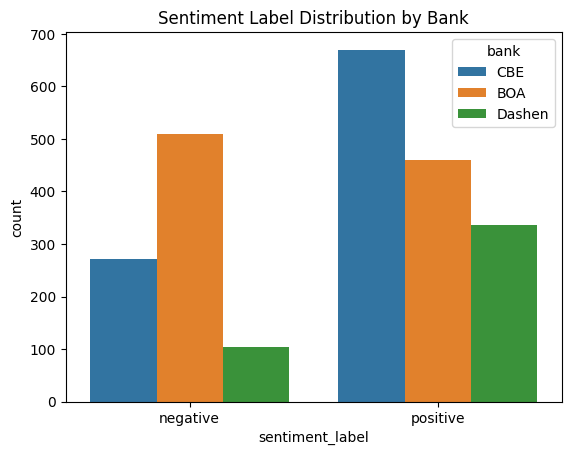

In [31]:
sns.countplot(data=df, x="sentiment_label", hue="bank")
plt.title("Sentiment Label Distribution by Bank")
plt.show()

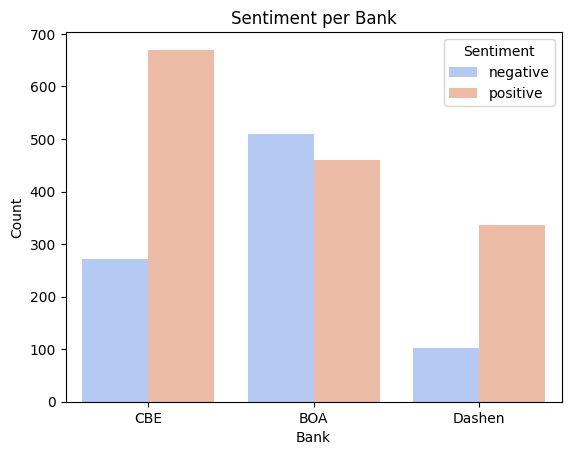

In [32]:
viz.plot_sentiment_by_bank()

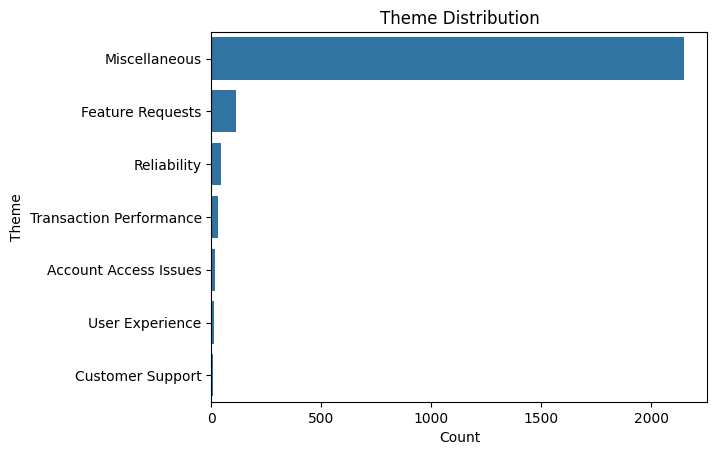

In [33]:
viz.plot_theme_distribution()

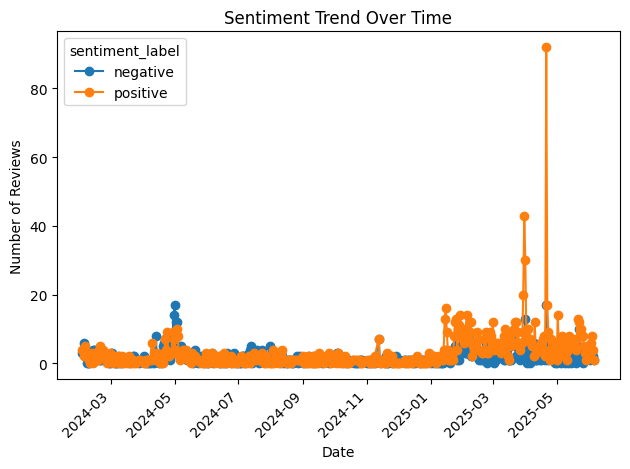

In [34]:
viz.plot_sentiment_over_time()

## 5. 📈 Sentiment Score Distribution

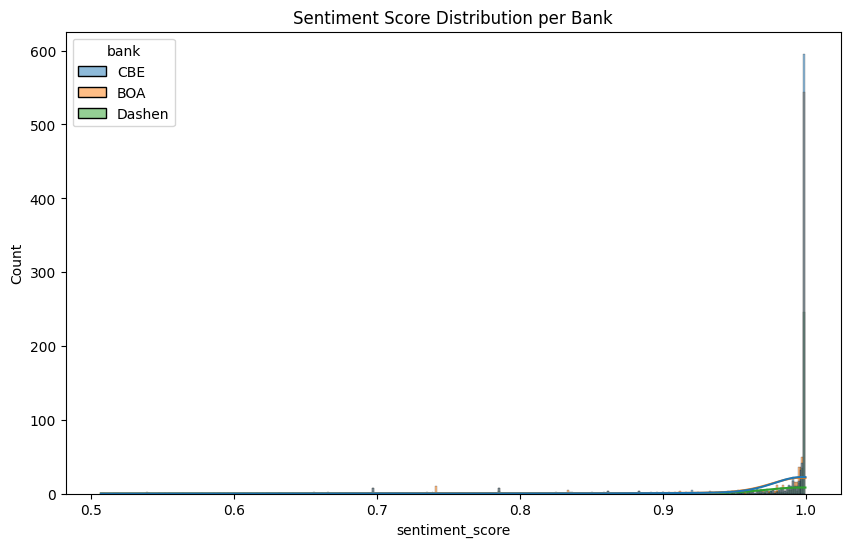

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="sentiment_score", hue="bank", kde=True)
plt.title("Sentiment Score Distribution per Bank")
plt.show()

## 6. 🏦 Mean Sentiment by Bank & Rating

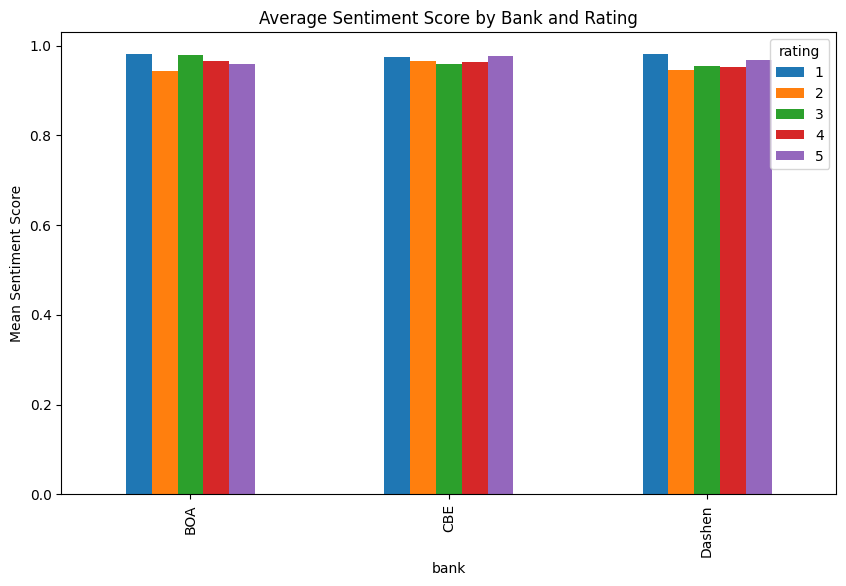

In [36]:
mean_sentiment = df.groupby(["bank", "rating"])["sentiment_score"].mean().unstack()
mean_sentiment.plot(kind="bar", figsize=(10, 6))
plt.title("Average Sentiment Score by Bank and Rating")
plt.ylabel("Mean Sentiment Score")
plt.show()

## 7. 🧵 Top Themes by Bank

In [37]:
from collections import Counter
import ast

def flatten_theme_lists(series):
    all_themes = []
    for themes in series.dropna():
        all_themes.extend(ast.literal_eval(themes))  # convert string repr of list to list
    return Counter(all_themes)

for bank in df["bank"].unique():
    print(f"\n🏦 Bank: {bank}")
    themes_counter = flatten_theme_lists(df[df["bank"] == bank]["themes"])
    for theme, count in themes_counter.most_common(5):
        print(f"   - {theme}: {count} mentions")



🏦 Bank: CBE
   - Miscellaneous: 880 mentions
   - Feature Requests: 43 mentions
   - Reliability: 18 mentions
   - Customer Support: 3 mentions
   - Transaction Performance: 3 mentions

🏦 Bank: BOA
   - Miscellaneous: 863 mentions
   - Feature Requests: 52 mentions
   - Reliability: 27 mentions
   - Transaction Performance: 19 mentions
   - Account Access Issues: 11 mentions

🏦 Bank: Dashen
   - Miscellaneous: 405 mentions
   - Feature Requests: 19 mentions
   - User Experience: 9 mentions
   - Transaction Performance: 6 mentions
   - Customer Support: 1 mentions


## 8. 🧠 Visualize Theme Frequencies

In [38]:
import plotly.express as px

theme_data = []

for bank in df["bank"].unique():
    themes_counter = flatten_theme_lists(df[df["bank"] == bank]["themes"])
    for theme, count in themes_counter.items():
        theme_data.append({"bank": bank, "theme": theme, "count": count})

theme_df = pd.DataFrame(theme_data)

px.bar(theme_df, x="theme", y="count", color="bank", barmode="group",
       title="Theme Frequency per Bank")


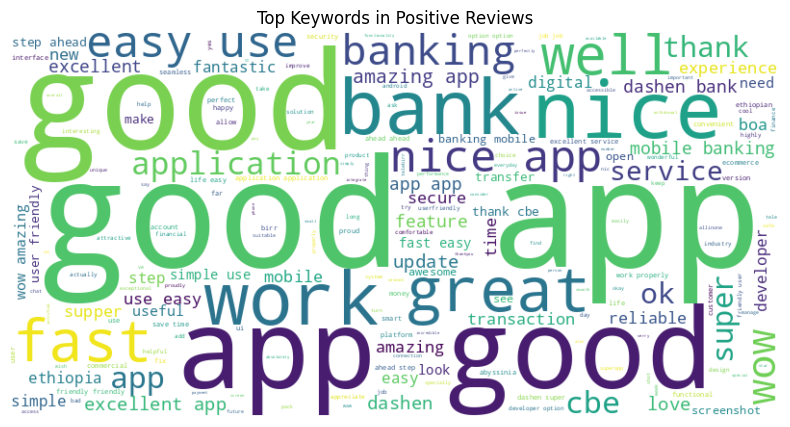

In [39]:
#world cloud of positive sentiments
viz.generate_wordcloud(sentiment="positive")

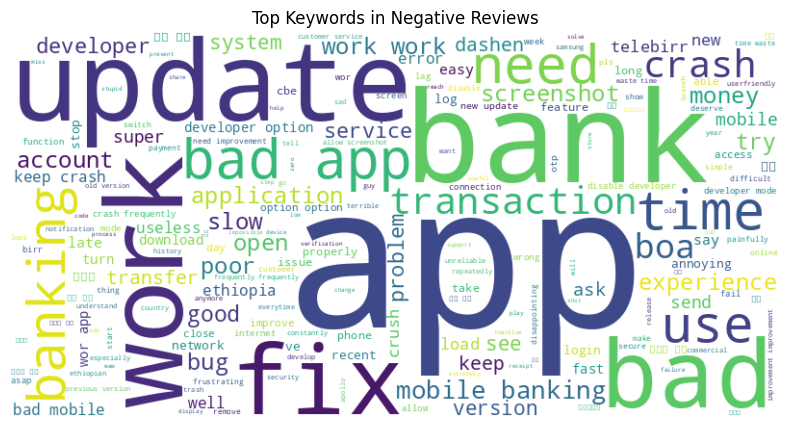

In [40]:
#world cloud of negative emotions
viz.generate_wordcloud(sentiment="negative")

## 9. 📌 Save Summaries

In [41]:
df[["review_text", "bank", "rating", "sentiment_label", "sentiment_score", "themes"]].to_csv(
    "../../data/outputs/summary_report.csv", index=False
)